In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [52]:
# Style setting

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [53]:
# Loading the main dataset

df = pd.read_excel('coffee_shop_sales_dataset.xlsx', sheet_name = 'Daily_Sales_Data')
print(f"Shape: {df.shape}")
print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")

Shape: (365, 26)
Date Range: 2023-01-01 to 2023-12-31


In [54]:
df
df.info

<bound method DataFrame.info of            Date  Day_of_Week   Day_Name  Is_Weekend  Month  Season  \
0    2023-01-01            7     Sunday           1      1  Winter   
1    2023-01-02            1     Monday           0      1  Winter   
2    2023-01-03            2    Tuesday           0      1  Winter   
3    2023-01-04            3  Wednesday           0      1  Winter   
4    2023-01-05            4   Thursday           0      1  Winter   
..          ...          ...        ...         ...    ...     ...   
360  2023-12-27            3  Wednesday           0     12  Winter   
361  2023-12-28            4   Thursday           0     12  Winter   
362  2023-12-29            5     Friday           0     12  Winter   
363  2023-12-30            6   Saturday           1     12  Winter   
364  2023-12-31            7     Sunday           1     12  Winter   

     Temperature_C  Is_Raining  Rainfall_mm  Is_Holiday  ...  Pastry_Sales  \
0              9.0           1          2.7      

In [55]:
df.isnull().sum()

Date                     0
Day_of_Week              0
Day_Name                 0
Is_Weekend               0
Month                    0
Season                   0
Temperature_C            0
Is_Raining               0
Rainfall_mm              0
Is_Holiday               0
Promotion_Active         0
Nearby_Events            0
Staff_Count              0
Machine_Issues           0
Num_Customers            0
Coffee_Sales             0
Pastry_Sales             0
Sandwich_Sales           0
Daily_Revenue            0
Staff_Cost               0
Ingredient_Cost          0
Utilities_Cost           0
Rent_Cost                0
Total_Costs              0
Daily_Profit             0
Customer_Satisfaction    0
dtype: int64

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Week_of_Year'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter
df

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Week_of_Year,Quarter
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,160,135.3,42.10,200,537.40,-126.28,6.3,1,52,1
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,320,58.7,57.80,200,636.50,-431.38,7.3,2,1,1
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,400,112.4,42.33,200,754.73,-295.51,7.6,3,1,1
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,240,80.1,44.42,200,564.52,-366.03,4.8,4,1,1
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,240,63.1,49.47,200,552.57,-350.92,6.8,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,3,Wednesday,0,12,Winter,-4.9,0,0.0,0,...,320,61.9,49.34,200,631.24,-383.38,5.9,361,52,4
361,2023-12-28,4,Thursday,0,12,Winter,7.5,0,0.0,0,...,320,95.1,42.13,200,657.23,-336.71,7.3,362,52,4
362,2023-12-29,5,Friday,0,12,Winter,15.9,0,0.0,0,...,240,108.5,50.17,200,598.67,-235.76,8.3,363,52,4
363,2023-12-30,6,Saturday,1,12,Winter,12.8,0,0.0,0,...,240,143.1,52.62,200,635.72,-146.80,6.4,364,52,4


In [57]:
le = LabelEncoder()
df['Day_Name_Encoded'] = le.fit_transform(df['Day_Name'])
df['Season_Encoded'] = le.fit_transform(df['Season'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   365 non-null    datetime64[ns]
 1   Day_of_Week            365 non-null    int64         
 2   Day_Name               365 non-null    object        
 3   Is_Weekend             365 non-null    int64         
 4   Month                  365 non-null    int64         
 5   Season                 365 non-null    object        
 6   Temperature_C          365 non-null    float64       
 7   Is_Raining             365 non-null    int64         
 8   Rainfall_mm            365 non-null    float64       
 9   Is_Holiday             365 non-null    int64         
 10  Promotion_Active       365 non-null    int64         
 11  Nearby_Events          365 non-null    int64         
 12  Staff_Count            365 non-null    int64         
 13  Machi

In [58]:
remove_columns = ['Date', 'Day_Name', 'Season', 'Daily_Revenue', 'Staff_Cost', 'Ingredient_Cost', 'Utilities_Cost', 'Rent_Cost', 'Total_Costs', 'Daily_Profit']
feature_cols = [col for col in df.columns if col not in remove_columns]
X = df[feature_cols]
y = df['Daily_Revenue']
print(f"Features selected: {len(feature_cols)} columns")
print(f"Target variable: Daily_Revenue")
print(f"Feature columns:\n{feature_cols}")
print("\nFeatures clearly organized list:")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")

Features selected: 21 columns
Target variable: Daily_Revenue
Feature columns:
['Day_of_Week', 'Is_Weekend', 'Month', 'Temperature_C', 'Is_Raining', 'Rainfall_mm', 'Is_Holiday', 'Promotion_Active', 'Nearby_Events', 'Staff_Count', 'Machine_Issues', 'Num_Customers', 'Coffee_Sales', 'Pastry_Sales', 'Sandwich_Sales', 'Customer_Satisfaction', 'Day_of_Year', 'Week_of_Year', 'Quarter', 'Day_Name_Encoded', 'Season_Encoded']

Features clearly organized list:
 1. Day_of_Week
 2. Is_Weekend
 3. Month
 4. Temperature_C
 5. Is_Raining
 6. Rainfall_mm
 7. Is_Holiday
 8. Promotion_Active
 9. Nearby_Events
10. Staff_Count
11. Machine_Issues
12. Num_Customers
13. Coffee_Sales
14. Pastry_Sales
15. Sandwich_Sales
16. Customer_Satisfaction
17. Day_of_Year
18. Week_of_Year
19. Quarter
20. Day_Name_Encoded
21. Season_Encoded


In [59]:
y.describe()

count    365.000000
mean     318.039507
std      104.605727
min       50.000000
25%      246.510000
50%      313.430000
75%      376.510000
max      698.790000
Name: Daily_Revenue, dtype: float64

In [ ]:
print("\nTop 10 Correlated Features with Daily Revenue")
correlations = df[feature_cols + ['Daily_Revenue']].corr()['Daily_Revenue'].sort_values(ascending=False)
print(correlations.head(11)[1:])  # Exclude self-correlation



🔗 Top 10 Features Correlated with Daily Revenue:
Coffee_Sales             0.850058
Num_Customers            0.826685
Pastry_Sales             0.709539
Sandwich_Sales           0.599494
Nearby_Events            0.314505
Customer_Satisfaction    0.310457
Is_Weekend               0.309296
Day_of_Week              0.272246
Temperature_C            0.269180
Staff_Count              0.266494
Name: Daily_Revenue, dtype: float64


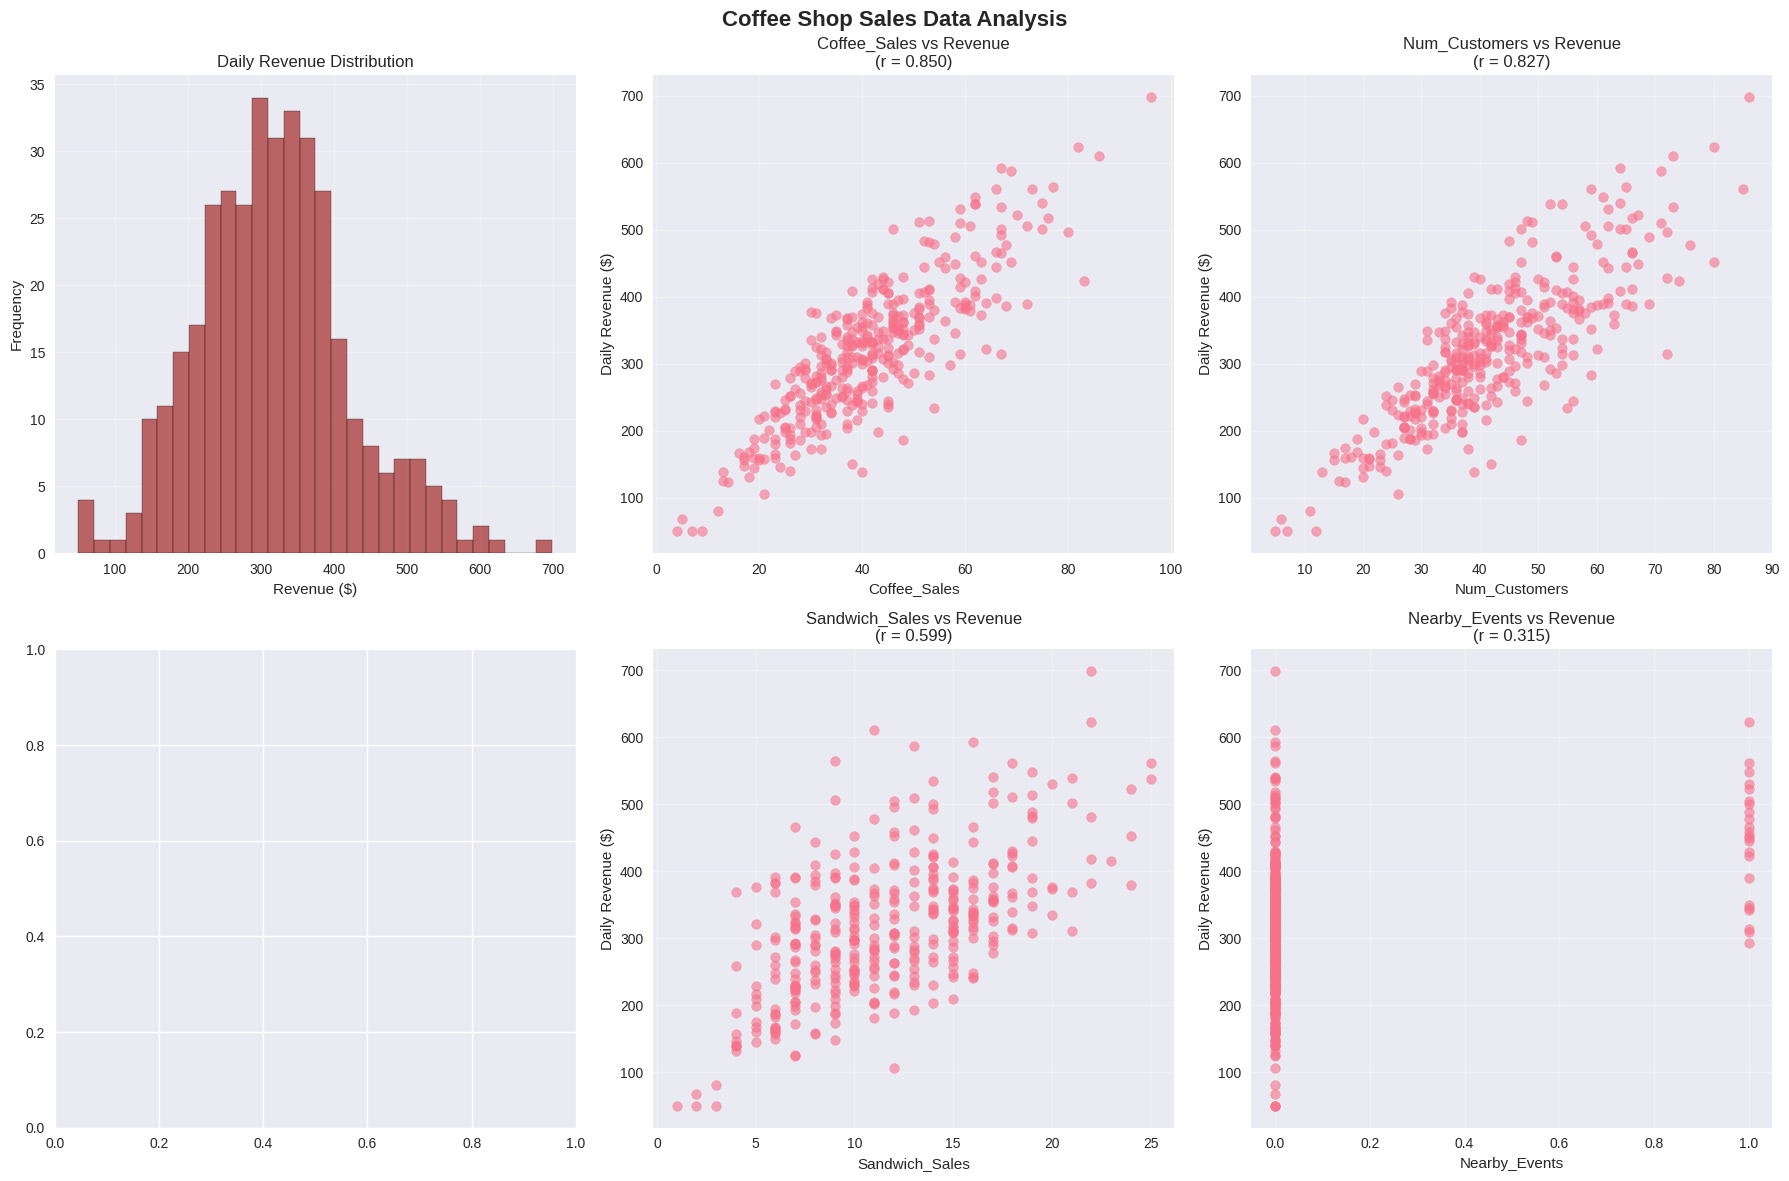

In [62]:
# Visualizations

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Coffee Shop Sales Data Analysis', fontsize=16, fontweight='bold')

axes[0, 0].hist(y, bins=30, alpha=0.7, color='brown', edgecolor='black')
axes[0, 0].set_title('Daily Revenue Distribution')
axes[0, 0].set_xlabel('Revenue ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)


# Top correlations

top_features = correlations.head(6)[1:].index  # Top 5 excluding self
for i, feature in enumerate(top_features):
    if i < 5:
        row = i // 3
        col = (i + 1) % 3
        if row == 0 and col == 0:
            continue  # Skip first position (already used)
        axes[row, col].scatter(df[feature], y, alpha=0.6)
        axes[row, col].set_title(f'{feature} vs Revenue\n(r = {correlations[feature]:.3f})')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Daily Revenue ($)')
        axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()